# Sales Channel Prediction Case Study  

## The advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. 

![tv](https://content.thriveglobal.com/wp-content/uploads/2021/05/marketing-campaign.jpg)

### The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

## Understanding Dataset

## Features:

    `TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
    `Radio: advertising dollars spent on Radio
    `Newspaper: advertising dollars spent on Newspaper
## Target:

    `Sales budget in thousands of dollars

# Importing Libraries

In [16]:
#Importing required packages.

import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


#feature engineering

from sklearn.preprocessing import StandardScaler, LabelEncoder

#train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#ML models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset and Data Information

In [2]:
#Loading dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

#Let's check how the data is distributed
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### Reviewing Data Set at initial stage, found continous datatypes; Target variable data is sales which seems to represent regression problem

In [3]:
#Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### TV. radio, newspaper, sales are floating data columns; unnamed: 0 is integer data type columns

In [4]:
# no. of rows and coloumns
df.shape

(200, 5)

#### There are 200 Rows and 5 Columns in Data Set

In [5]:
# check for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

#### There are no null or missing values in data set

In [6]:
# check the stats
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Data Visualization

<AxesSubplot:xlabel='sales', ylabel='Density'>

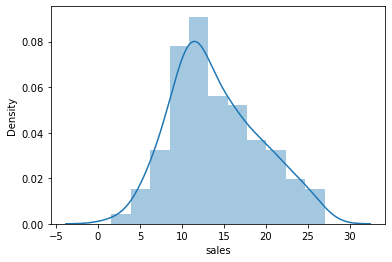

In [7]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

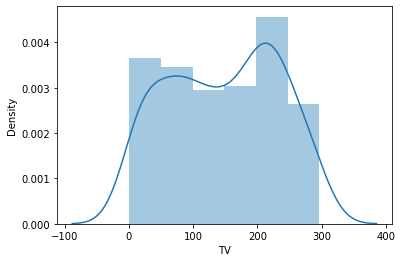

In [8]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

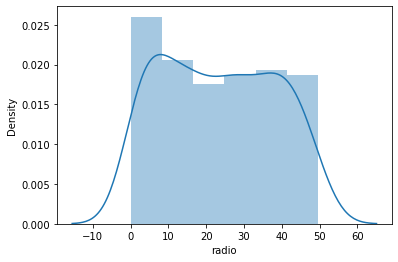

In [9]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

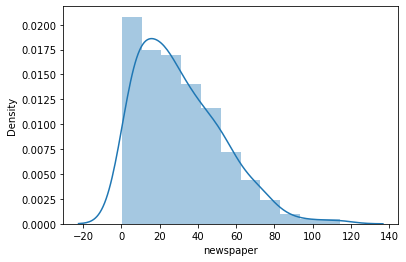

In [10]:
sns.distplot(df['newspaper'])

#### using distplot, found there are skewness in newspaper column

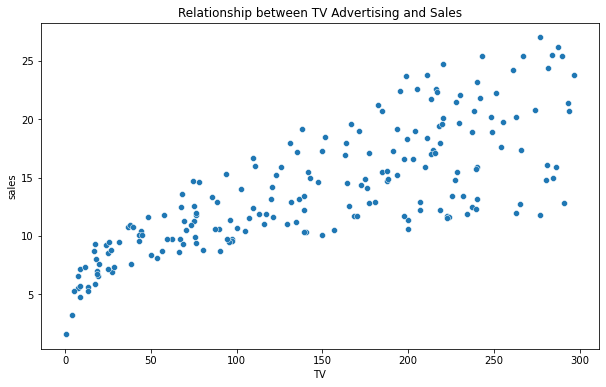

In [17]:
plt.figure(figsize=[10,6])
plt.title('Relationship between TV Advertising and Sales')
sns.scatterplot(df['TV'], df['sales']);

#### Upon reviewing above plot, as TV advertising is increased, sales are also increased.

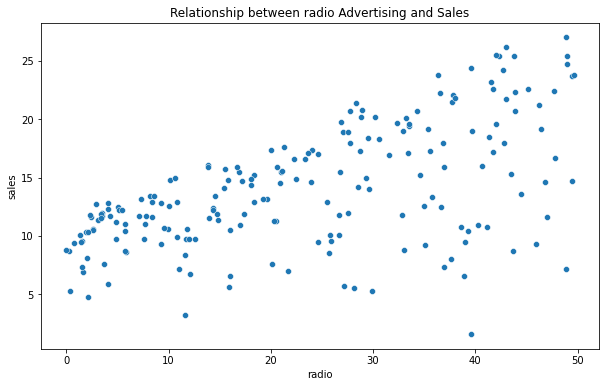

In [19]:
plt.figure(figsize=[10,6])
plt.title('Relationship between radio Advertising and Sales')
sns.scatterplot(df['radio'], df['sales']);

#### Upon reviewing above plot, similar to TV advertising, as radio advertising is increased, sales are also increased. But Radio advertising is less effective than TV.

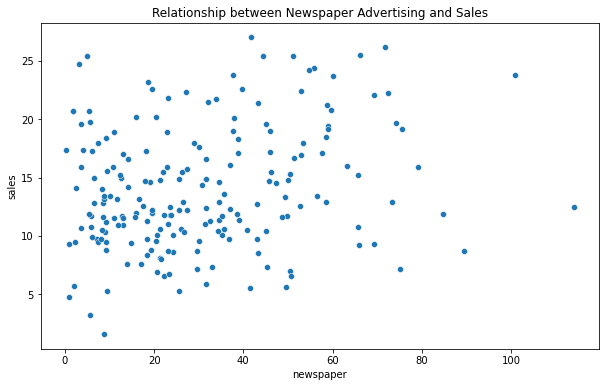

In [20]:
plt.figure(figsize=[10,6])
plt.title('Relationship between Newspaper Advertising and Sales')
sns.scatterplot(df['newspaper'], df['sales']);


#### Upon reviewing above plot, newspaper advertising has high effect on sales positively at initial. However, as advertising is increased, it has low effect on sales and almost nil at max.
#### TV advertising has higher positive impact on sales and followed by radio. So TV and radio will have higher correlation with sales

In [21]:
# corelation
corr_mat=df.corr()
corr_mat

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


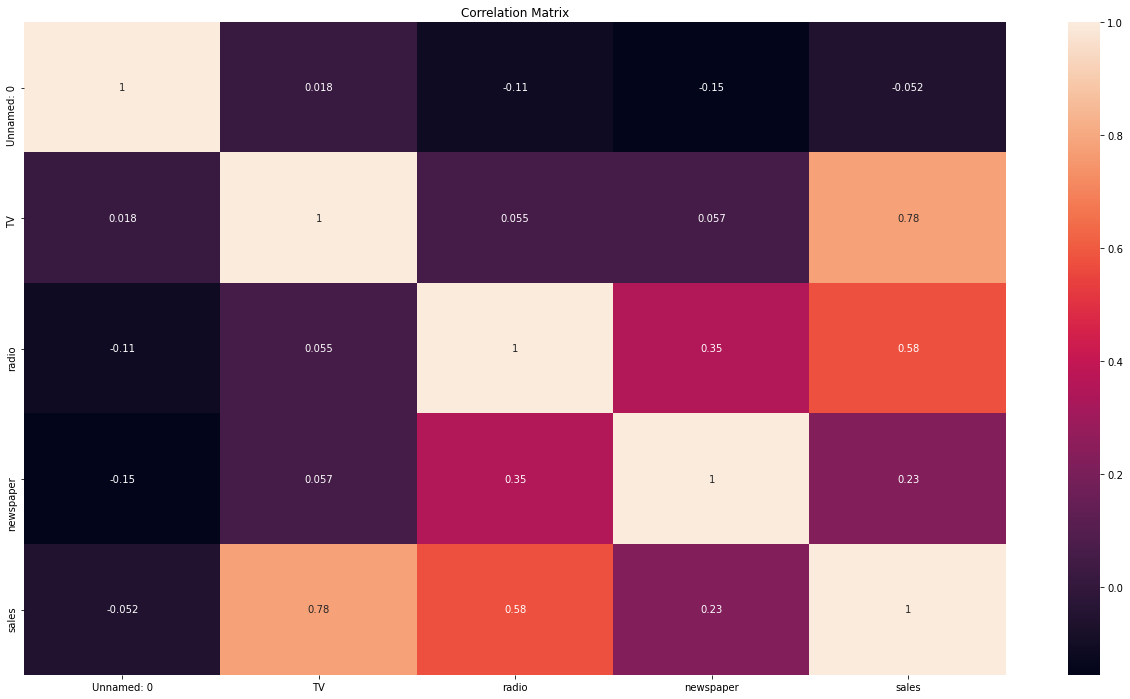

In [22]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:>

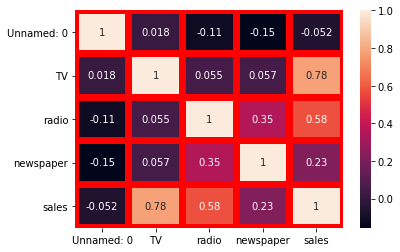

In [23]:
sns.heatmap(corr_mat,annot=True,linewidths=6,linecolor='r')

In [24]:
corr_mat["sales"].sort_values(ascending=False)

sales         1.000000
TV            0.782224
radio         0.576223
newspaper     0.228299
Unnamed: 0   -0.051616
Name: sales, dtype: float64

#### Checking the Correlation between the target value and rest columns using Heatmap, Correlation Matrix.

#### Upon review, found TV, radio are highly correlated with sales data which coincides with the graphical data analysis done in above steps

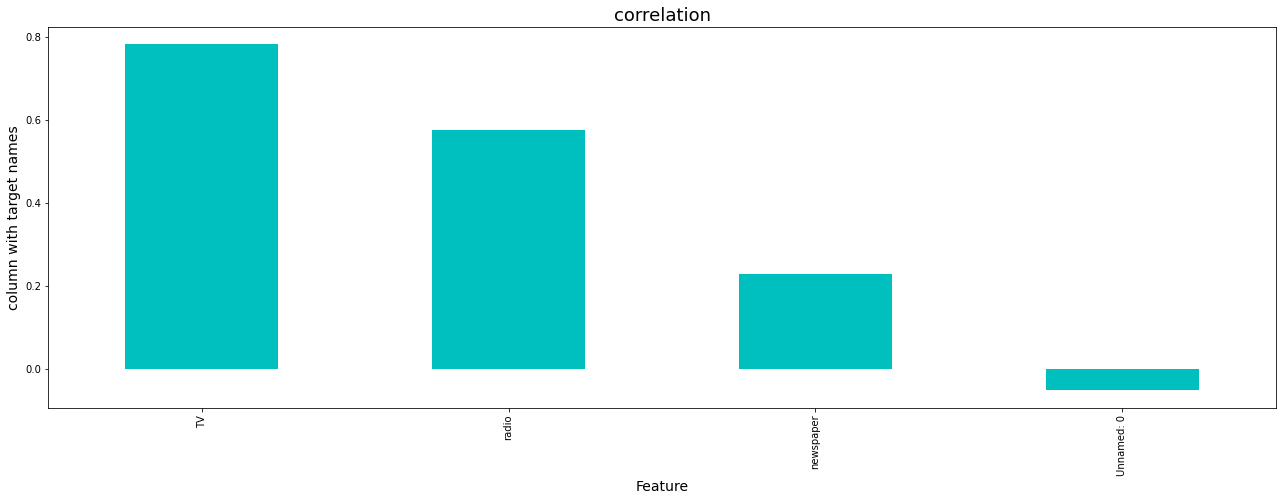

In [25]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

#### TV Advertising increases the sales high which is followed by Radio Advertising

# Feature and Label Seperation

In [26]:
x=df.drop("sales",axis=1)
y=df["sales"]

# Skewness

In [27]:
x.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
dtype: float64

#### Checking for the Skewness and found newspaper has more skewness as predicted by distplot analysis

In [28]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x)

df_skew=pd.DataFrame(df_skew,columns=x.columns)

In [29]:
# Removing Skewness through Power Transforms
df_skew.skew()

Unnamed: 0   -0.268270
TV           -0.315199
radio        -0.242968
newspaper    -0.077942
dtype: float64

#### Checking Skewness after power transforms and found all columns skewness is within range of -0.5 to +0.5

In [30]:
df=df_skew
x=df_skew

# Outlier Detection

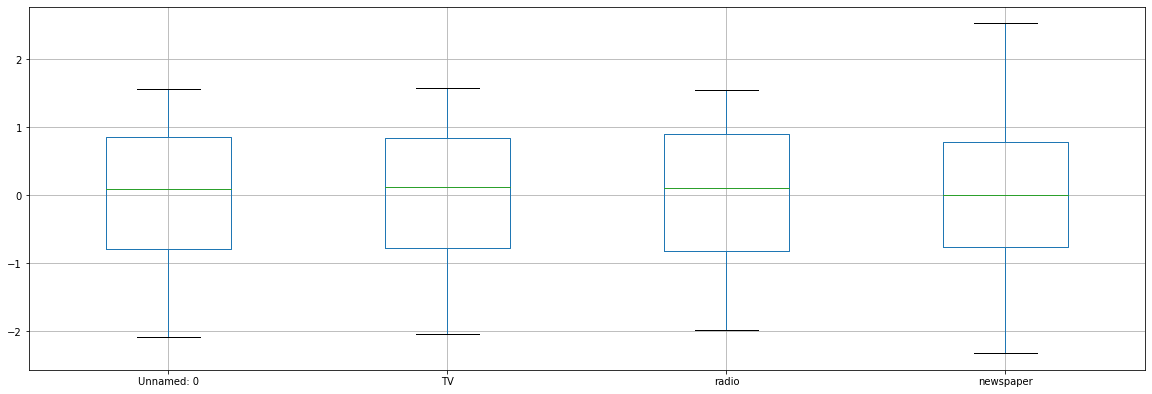

In [31]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

#### Checking for Outliers through box plot graphs and found no outliers;

<AxesSubplot:>

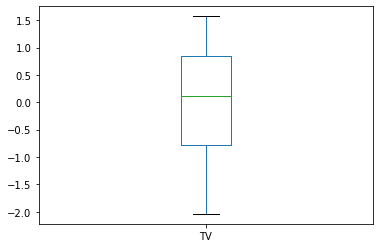

In [33]:
df['TV'].plot.box()

<AxesSubplot:>

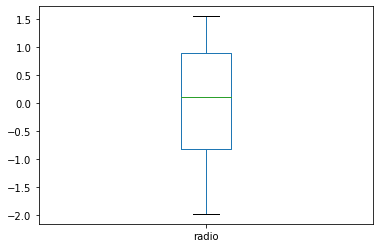

In [34]:
df['radio'].plot.box()

<AxesSubplot:>

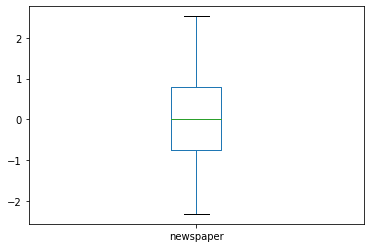

In [35]:
df['newspaper'].plot.box()

#### No outlier detected

# Data Standardization

In [38]:
# Scaling the Feature data

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)
x

array([[-2.07937596,  0.94867429,  0.96224689,  1.51433531],
       [-2.03292263, -1.19131426,  1.0401788 ,  0.78768252],
       [-1.990711  , -1.6477566 ,  1.37070964,  1.51699753],
       [-1.95139683,  0.14102023,  1.14238689,  1.21465643],
       [-1.91424742,  0.45271493, -0.74865064,  1.21170398],
       [-1.87880665, -1.82382233,  1.51501853,  1.66502354],
       [-1.8447658 , -1.00249116,  0.69372704, -0.1077535 ],
       [-1.81190337, -0.210275  , -0.10158544, -0.84409341],
       [-1.7800535 , -1.82609501, -1.63345378, -2.13259669],
       [-1.74908785,  0.64764492, -1.56676988, -0.22900395],
       [-1.71890445, -0.88377378, -1.20298758, -0.07226156],
       [-1.68942058,  0.79708355,  0.18072579, -1.60261898],
       [-1.66056789, -1.52641627,  0.81900563,  1.42512925],
       [-1.63228912, -0.48036844, -1.02813642, -1.22982506],
       [-1.60453563,  0.69106577,  0.6992403 ,  0.81860579],
       [-1.57726567,  0.60295713,  1.45770359,  1.04432344],
       [-1.55044308, -0.

# Train Test Split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=100)

# Model Building

#### Linear Regression Model Build:

In [41]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test,predlr))
print(mean_squared_error(y_test,predlr))
print(np.sqrt(mean_squared_error(y_test,predlr)))

0.9257857600065251
1.5771226395503335
1.2558354348999448


In [42]:
scr = cross_val_score(lr,x,y,cv=5)
print('Cross validation score for Linear Regression Model is ',scr.mean())

Cross validation score for Linear Regression Model is  0.8953473674194841


#### Linear Regression Model Difference is 92.57 - 89.53 = 3.04

#### Ridge Regression Model Build:

In [43]:
r = Ridge()
r.fit(x_train,y_train)
predr = r.predict(x_test)
print(r2_score(y_test,predr))
print(mean_squared_error(y_test,predr))
print(np.sqrt(mean_squared_error(y_test,predr)))

0.924807681691509
1.597907726805838
1.264083749917638


In [44]:
scr = cross_val_score(r,x,y,cv=5)
print('Cross validation score for Ridge Regression Model is', scr.mean())

Cross validation score for Ridge Regression Model is 0.8953866482738437


#### Ridge Regression Model Difference is 92.48 - 89.53 = 2.95

#### Lasso Regression Model Build:

In [45]:
l = Lasso()
l.fit(x_train,y_train)
predl = l.predict(x_test)
print(r2_score(y_test,predl))
print(mean_squared_error(y_test,predl))
print(np.sqrt(mean_squared_error(y_test,predl)))

0.8285851353014799
3.6427276476221095
1.908593106877972


In [46]:
scr = cross_val_score(l,x,y,cv=5)
print('Cross validation score for Lasso Regression Model is ', scr.mean())

Cross validation score for Lasso Regression Model is  0.8270960357806555


#### Lasso Regression Model Difference is 82.85 - 82.70 = 0.15
#### Random Forest Regressor Model Build:

In [47]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

0.9848671779576847
0.32158675000000037
0.5670861927432199


In [48]:
scr = cross_val_score(rf,x,y,cv=5)
print('Cross validation score for Random Forest Regressor Model is', scr.mean())

Cross validation score for Random Forest Regressor Model is 0.971459277057142


#### Random Forest Regressor Model Difference is 98.53 - 97.33 = 1.20

#### Lasso Regression Model has the least difference in r2_score so it is the best model

# Hyper Parameter Tuning

In [49]:
parameters1 = {'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
             'random_state': [200, 700, 900],
             'max_iter': [200, 900],
             'selection': ['cyclic','random']}
GCV=GridSearchCV(Lasso(),parameters1,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
                         'max_iter': [200, 900],
                         'random_state': [200, 700, 900],
                         'selection': ['cyclic', 'random']})

In [50]:
GCV.best_params_

{'alpha': 4.0, 'max_iter': 200, 'random_state': 200, 'selection': 'cyclic'}

### Obtaining the Best Parameters for Hyper parameters tuning

In [51]:
mod1=Lasso(alpha=4.0,random_state=200,selection='cyclic',max_iter=200)

mod1.fit(x_train,y_train)
pred=mod1.predict(x_test)
print(r2_score(y_test,predrf)*100)
print(mean_squared_error(y_test,predrf))
print(np.sqrt(mean_squared_error(y_test,predrf)))

98.48671779576847
0.32158675000000037
0.5670861927432199


### Lasso Model r2_score after Hyper parameter Tuning is 98.53%

# Save the model

In [52]:
import joblib
joblib.dump(mod1,"Advertising_Sales_Lasso.pkl")

['Advertising_Sales_Lasso.pkl']

## If you are doing business and you are not into tv advertising, you are losing business. It is the most dependable and traditional way of advertising. TV advertising in siti channel appeals to masses at large.

![tv](https://miro.medium.com/max/640/1*mO223lvQAQrIIlqJSh496w.jpeg)